<a href="https://colab.research.google.com/github/HanifRidal/MachineLearning_assignment/blob/main/SKLearn_12_Logistic_Regression_pada_Binary_Classification_Task_Belajar_Machine_Learning_Dasar.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
print('Hanif Ridal Warits - 41155050210060')

Hanif Ridal Warits - 41155050210060


In [ ]:
import pandas as pd

df = pd.read_csv('./dataset/SMSSpamCollection',
                sep='\t',
                header=None,
                names=['label', 'sms'])
df.head()

,label,sms
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
print('Hanif Ridal Warits - 41155050210060\n')
df['label'].value_counts()

Hanif Ridal Warits - 41155050210060



label
ham     4825
spam     747
Name: count, dtype: int64

In [ ]:
from sklearn.preprocessing import LabelBinarizer

X = df['sms'].values
y = df['label'].values

lb = LabelBinarizer()
y= lb.fit_transform(y).ravel() #ravel untuk mengembalikan array dari array 2 dimensi
lb.classes_


array(['ham', 'spam'], dtype='<U4')

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split (X,
                                                     y,
                                                     test_size = 0.25,
                                                     random_state=0)

print (X_train, '\n')
print (y_train)


['Its going good...no problem..but still need little experience to understand american customer voice...'
 'U have a secret admirer. REVEAL who thinks U R So special. Call 09065174042. To opt out Reply REVEAL STOP. 1.50 per msg recd. Cust care 07821230901'
 'Ok...' ...
 "For ur chance to win a £250 cash every wk TXT: ACTION to 80608. T's&C's www.movietrivia.tv custcare 08712405022, 1x150p/wk"
 'R U &SAM P IN EACHOTHER. IF WE MEET WE CAN GO 2 MY HOUSE'
 'Mm feeling sleepy. today itself i shall get that dear'] 

[0 1 0 ... 1 0 0]


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(stop_words='english')

X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

print(X_train_tfidf)

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 32656 stored elements and shape (4179, 7287)>
  Coords	Values
  (0, 2997)	0.23173982975834367
  (0, 3007)	0.21421364306658514
  (0, 5123)	0.308974289326673
  (0, 4453)	0.2297719954323795
  (0, 3926)	0.3126721340000456
  (0, 2554)	0.3825278811525034
  (0, 6739)	0.3546359942830148
  (0, 900)	0.4114867709157148
  (0, 2006)	0.2898082580285881
  (0, 6903)	0.3591386422223876
  (1, 5642)	0.24344998442301355
  (1, 799)	0.25048918791028574
  (1, 5441)	0.5009783758205715
  (1, 6472)	0.24039776602646504
  (1, 6013)	0.20089911182610476
  (1, 216)	0.28902673040368515
  (1, 4677)	0.24039776602646504
  (1, 5394)	0.16464655071448758
  (1, 6131)	0.16142609035094446
  (1, 532)	0.20186022353306565
  (1, 4358)	0.17341410292348694
  (1, 5301)	0.2711077935907125
  (1, 2003)	0.2711077935907125
  (1, 1548)	0.18167737976542422
  (1, 36)	0.28902673040368515
  :	:
  (4176, 6792)	0.1407604617250961
  (4176, 6693)	0.16491299289150899
  (4176, 6684)	0.22

In [ ]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train_tfidf, y_train)
y_pred = model.predict(X_test_tfidf)

for pred, sms in zip(y_pred[:5], X_test[:5]):
    print (f'PRED: {pred} - SMS: {sms}\n')

PRED: 0 - SMS: Storming msg: Wen u lift d phne, u say "HELLO" Do u knw wt is d real meaning of HELLO?? . . . It's d name of a girl..! . . . Yes.. And u knw who is dat girl?? "Margaret Hello" She is d girlfrnd f Grahmbell who invnted telphone... . . . . Moral:One can 4get d name of a person, bt not his girlfrnd... G o o d n i g h t . . .@

PRED: 0 - SMS: <Forwarded from 448712404000>Please CALL 08712404000 immediately as there is an urgent message waiting for you.

PRED: 0 - SMS: And also I've sorta blown him off a couple times recently so id rather not text him out of the blue looking for weed

PRED: 0 - SMS: Sir Goodmorning, Once free call me.

PRED: 0 - SMS: All will come alive.better correct any good looking figure there itself..



In [ ]:
from sklearn.metrics import confusion_matrix

matrix = confusion_matrix(y_test, y_pred)
matrix

array([[1207,    1],
       [  47,  138]])

In [ ]:
tn, fp, fn, tp = matrix.ravel()


print('Hanif Ridal Warits - 41155050210060\n')
print(f'TN: {tn}')
print(f'FP: {fp}')
print(f'FN: {fn}')
print(f'TP: {tp}')

Hanif Ridal Warits - 41155050210060

TN: 1207
FP: 1
FN: 47
TP: 138


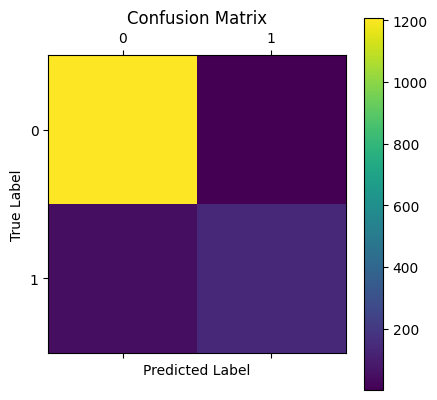

Hanif Ridal Warits - 41155050210060



In [ ]:
import matplotlib.pyplot as plt

plt.matshow(matrix)
plt.colorbar()

plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

print('Hanif Ridal Warits - 41155050210060\n')

In [ ]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred)

0.9655419956927495

In [ ]:
from sklearn.metrics import precision_score

precision_score(y_test, y_pred)

np.float64(0.9928057553956835)

In [ ]:
from sklearn.metrics import recall_score

recall_score(y_test, y_pred)

np.float64(0.745945945945946)

In [ ]:
from sklearn.metrics import f1_score

f1_score(y_test, y_pred)

np.float64(0.8518518518518519)

In [ ]:
print('Hanif Ridal Warits - 41155050210060\n')

Hanif Ridal Warits - 41155050210060



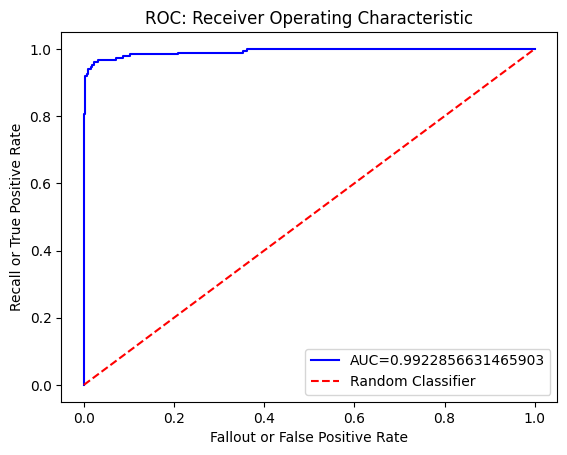

In [ ]:
from sklearn.metrics import roc_curve, auc

prob_estimates = model.predict_proba(X_test_tfidf)
fpr, tpr, threshold = roc_curve(y_test, prob_estimates[:, 1])
nilai_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, 'b', label=f'AUC={nilai_auc}')
plt.plot([0, 1], [0, 1], 'r--', label='Random Classifier')

plt.title('ROC: Receiver Operating Characteristic')
plt.xlabel('Fallout or False Positive Rate')
plt.ylabel('Recall or True Positive Rate')
plt.legend()
plt.show()


In [ ]:
print('Hanif Ridal Warits - 41155050210060\n')

Hanif Ridal Warits - 41155050210060

